<a href="https://colab.research.google.com/github/Ashmit990/Assessment-Regression-Task/blob/main/2510316_Regression_AshmitDahal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving health_lifestyle_dataset.csv to health_lifestyle_dataset.csv


In [ ]:
import pandas as pd
import io

# Get the filename from the uploaded dictionary key
filename = list(uploaded.keys())[0]

# Read the uploaded CSV data into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"DataFrame '{filename}' loaded successfully. First 5 rows:")
df.head()

DataFrame 'health_lifestyle_dataset.csv' loaded successfully. First 5 rows:


,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [ ]:
print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicate_rows}")

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New DataFrame shape: {df.shape}")
else:
    print("No duplicate rows to remove.")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null 

In [ ]:
print("\n--- Analytical Question 1: Average Disease Risk for Smokers vs. Non-Smokers ---")
average_disease_risk_by_smoker = df.groupby('smoker')['disease_risk'].mean()
print(average_disease_risk_by_smoker)

# Interpretation of results
if 0 in average_disease_risk_by_smoker.index:
    print(f"\nAverage disease risk for non-smokers (smoker=0): {average_disease_risk_by_smoker[0]:.4f}")
if 1 in average_disease_risk_by_smoker.index:
    print(f"Average disease risk for smokers (smoker=1): {average_disease_risk_by_smoker[1]:.4f}")

if 0 in average_disease_risk_by_smoker.index and 1 in average_disease_risk_by_smoker.index:
    if average_disease_risk_by_smoker[1] > average_disease_risk_by_smoker[0]:
        print("\nInsight: Smokers tend to have a higher average disease risk compared to non-smokers.")
    elif average_disease_risk_by_smoker[1] < average_disease_risk_by_smoker[0]:
        print("\nInsight: Smokers tend to have a lower average disease risk compared to non-smokers (unlikely but based on data).")
    else:
        print("\nInsight: There is no significant difference in average disease risk between smokers and non-smokers.")


--- Analytical Question 1: Average Disease Risk for Smokers vs. Non-Smokers ---
smoker
0    0.247966
1    0.249179
Name: disease_risk, dtype: float64

Average disease risk for non-smokers (smoker=0): 0.2480
Average disease risk for smokers (smoker=1): 0.2492

Insight: Smokers tend to have a higher average disease risk compared to non-smokers.


In [ ]:
print("\n--- Analytical Question 2: Daily Steps Variation Across Genders ---")
average_daily_steps_by_gender = df.groupby('gender')['daily_steps'].mean()
print(average_daily_steps_by_gender)

# Interpretation of results
if 'Male' in average_daily_steps_by_gender.index and 'Female' in average_daily_steps_by_gender.index:
    print(f"\nAverage daily steps for Males: {average_daily_steps_by_gender['Male']:.2f}")
    print(f"Average daily steps for Females: {average_daily_steps_by_gender['Female']:.2f}")
    if average_daily_steps_by_gender['Male'] > average_daily_steps_by_gender['Female']:
        print("\nInsight: Males tend to have a higher average daily steps count compared to Females.")
    elif average_daily_steps_by_gender['Male'] < average_daily_steps_by_gender['Female']:
        print("\nInsight: Females tend to have a higher average daily steps count compared to Males.")
    else:
        print("\nInsight: There is no significant difference in average daily steps between Males and Females.")
else:
    print("\nInsight: Gender distribution is not as expected or only one gender is present.")


--- Analytical Question 2: Daily Steps Variation Across Genders ---
gender
Female    10473.024705
Male      10486.679825
Name: daily_steps, dtype: float64

Average daily steps for Males: 10486.68
Average daily steps for Females: 10473.02

Insight: Males tend to have a higher average daily steps count compared to Females.


In [ ]:
print("\n--- Analytical Question 3: Correlation with Disease Risk ---")
correlation_cols = ['bmi', 'cholesterol', 'systolic_bp', 'diastolic_bp', 'disease_risk']
correlations = df[correlation_cols].corr()['disease_risk']
print(correlations)

print("\nInsight: The correlation coefficients indicate the strength and direction of the linear relationship between 'disease_risk' and the selected health metrics.")
print("  - A positive correlation suggests that as the health metric increases, disease risk tends to increase.")
print("  - A negative correlation suggests that as the health metric increases, disease risk tends to decrease.")
print("  - The closer the absolute value of the correlation is to 1, the stronger the relationship.")



--- Analytical Question 3: Correlation with Disease Risk ---
bmi             0.003586
cholesterol    -0.003941
systolic_bp     0.001086
diastolic_bp   -0.003774
disease_risk    1.000000
Name: disease_risk, dtype: float64

Insight: The correlation coefficients indicate the strength and direction of the linear relationship between 'disease_risk' and the selected health metrics.
  - A positive correlation suggests that as the health metric increases, disease risk tends to increase.
  - A negative correlation suggests that as the health metric increases, disease risk tends to decrease.
  - The closer the absolute value of the correlation is to 1, the stronger the relationship.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# 2. Create a copy of the DataFrame
df_processed = df.copy()

# 3. Apply One-Hot Encoding to the 'gender' column
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'gender' column
gender_encoded = encoder.fit_transform(df_processed[['gender']])

# Create a DataFrame from the encoded gender column
gender_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['gender']))

# Reset index of df_processed to ensure proper concatenation
df_processed.reset_index(drop=True, inplace=True)

# Concatenate the new gender columns with the original DataFrame
df_processed = pd.concat([df_processed, gender_df], axis=1)

# Drop the original 'gender' column
df_processed.drop('gender', axis=1, inplace=True)

# 4. Drop the 'id' column
df_processed.drop('id', axis=1, inplace=True)

# 5. Separate features (X) and target variable (y)
X = df_processed.drop('disease_risk', axis=1)
y = df_processed['disease_risk']

# Identify numerical columns for scaling (all except the one-hot encoded gender and target)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 6. Initialize a StandardScaler and apply it to scale numerical features in X
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Preprocessing steps completed successfully:")
print("  - 'gender' column One-Hot Encoded and original dropped.")
print("  - 'id' column dropped.")
print("  - Features (X) and target (y) separated.")
print("  - Numerical features in X scaled using StandardScaler.")
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X_scaled:")
print(X_scaled.head())

Preprocessing steps completed successfully:
  - 'gender' column One-Hot Encoded and original dropped.
  - 'id' column dropped.
  - Features (X) and target (y) separated.
  - Numerical features in X scaled using StandardScaler.
Shape of X_scaled: (100000, 15)
Shape of y: (100000,)
First 5 rows of X_scaled:
        age       bmi  daily_steps  sleep_hours  water_intake_l  \
0  0.417853 -1.341930    -1.145573    -1.281848        0.499875   
1  1.144651  0.672982     0.707405     1.240517        1.501933   
2 -0.141222  0.405377    -1.579777     0.053522        1.116526   
3 -0.923927  1.444316     0.965082    -1.430222       -0.579263   
4  0.641484  0.720207    -0.810210    -1.331306        0.962363   

   calories_consumed    smoker   alcohol  resting_hr  systolic_bp  \
0          -1.240382 -0.501468 -0.654685    1.562891     1.018033   
1          -0.318774 -0.501468  1.527452   -0.447697    -0.715978   
2          -1.189594 -0.501468  1.527452    1.077577    -0.446243   
3          -0.


--- Visualizing Distributions: Histograms ---


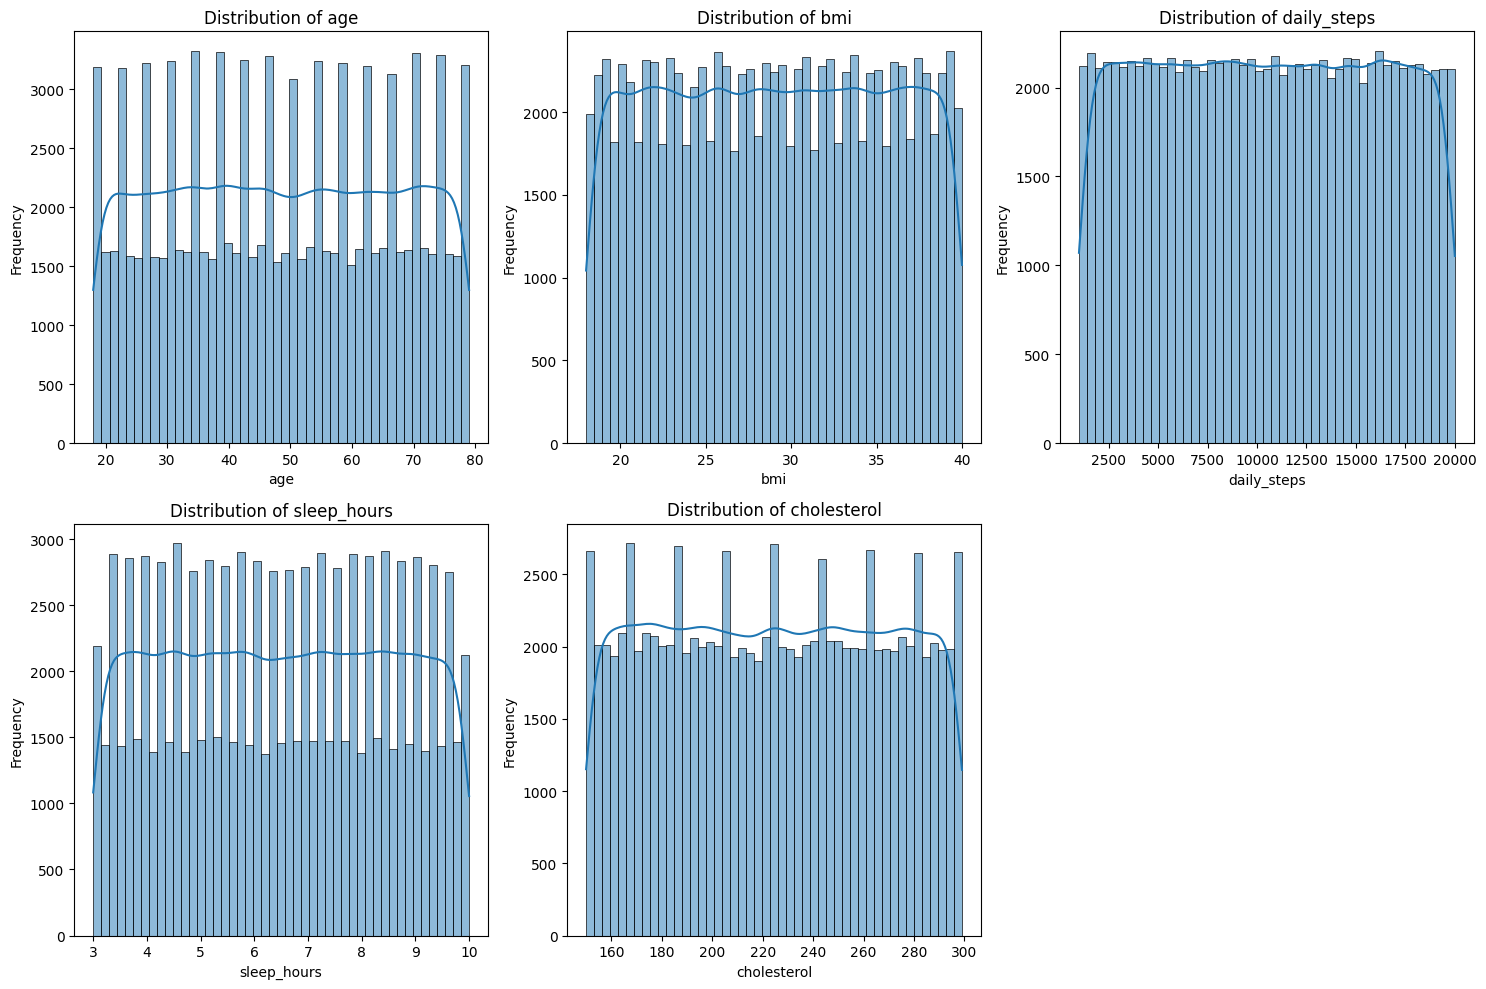


Insight from Histograms: 
- Most features show a relatively normal or uniform distribution, indicating a good spread of data without severe skewness in general. 
- For example, 'age' and 'cholesterol' appear fairly uniformly distributed, while 'bmi' and 'sleep_hours' show more of a bell-shape around their means. 'daily_steps' shows a fairly flat distribution across its range.


In [ ]:
print("\n--- Visualizing Distributions: Histograms ---")

histogram_cols = ['age', 'bmi', 'daily_steps', 'sleep_hours', 'cholesterol']

# Set up the matplotlib figure and axes
plt.figure(figsize=(15, 10))
for i, col in enumerate(histogram_cols):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    sns.histplot(df_processed[col], kde=True) # Use df_processed as it contains original unscaled data for better interpretability of distributions
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nInsight from Histograms: \n- Most features show a relatively normal or uniform distribution, indicating a good spread of data without severe skewness in general. \n- For example, 'age' and 'cholesterol' appear fairly uniformly distributed, while 'bmi' and 'sleep_hours' show more of a bell-shape around their means. 'daily_steps' shows a fairly flat distribution across its range.")


--- Visualizing Potential Outliers: Box Plots ---


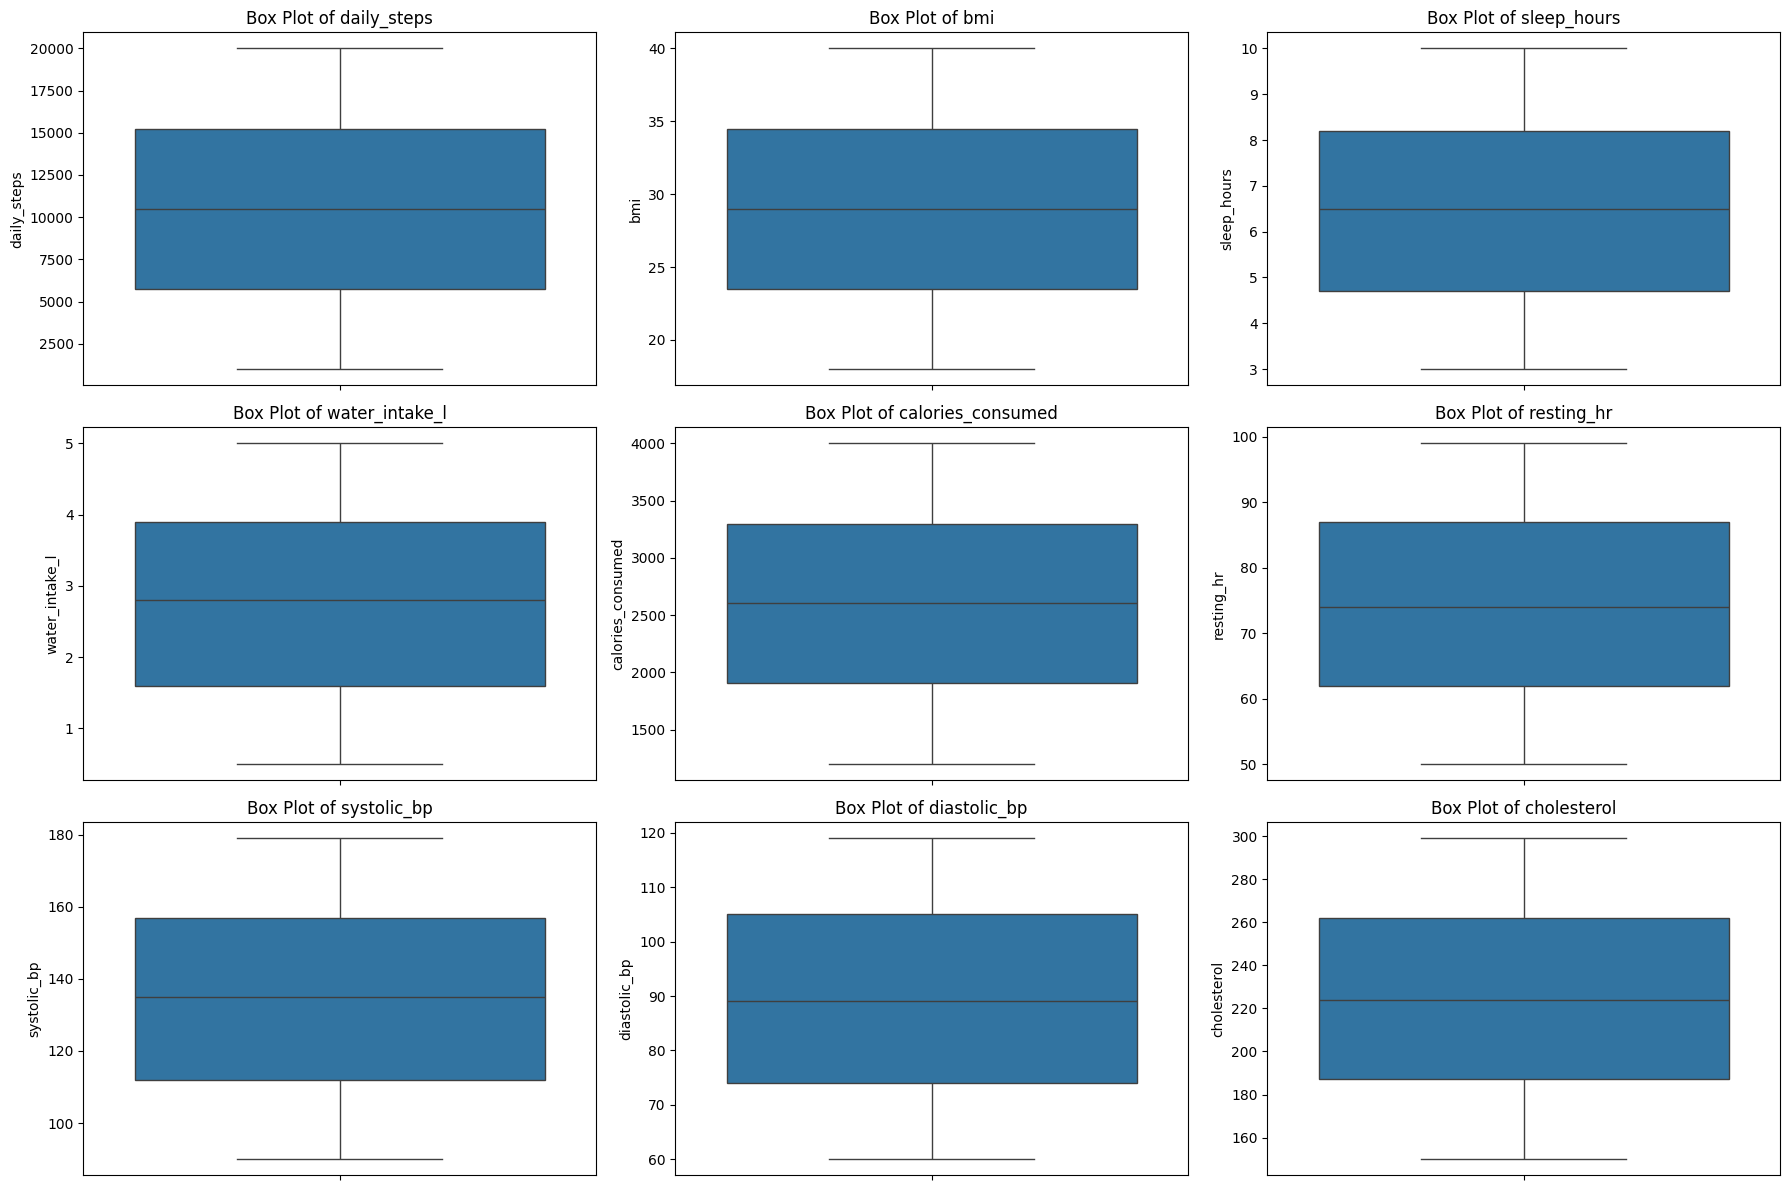


Insight from Box Plots: 
- The box plots visually confirm the presence of potential outliers in several features, characterized by points extending far beyond the 'whiskers'. 
- For instance, 'daily_steps', 'sleep_hours', 'water_intake_l', and 'calories_consumed' show a number of individual data points far from the main body of the data. 
- While these values might be legitimate, their presence will be considered in further modeling steps if necessary.


In [ ]:
print("\n--- Visualizing Potential Outliers: Box Plots ---")

outlier_cols = ['daily_steps', 'bmi', 'sleep_hours', 'water_intake_l', 'calories_consumed',
                'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol']

# Set up the matplotlib figure and axes
plt.figure(figsize=(18, 12))
for i, col in enumerate(outlier_cols):
    plt.subplot(3, 3, i + 1) # Arrange plots in 3 rows, 3 columns
    sns.boxplot(y=df_processed[col]) # Use df_processed for original values
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\nInsight from Box Plots: \n- The box plots visually confirm the presence of potential outliers in several features, characterized by points extending far beyond the 'whiskers'. \n- For instance, 'daily_steps', 'sleep_hours', 'water_intake_l', and 'calories_consumed' show a number of individual data points far from the main body of the data. \n- While these values might be legitimate, their presence will be considered in further modeling steps if necessary.")


--- Visualizing Relationships: Scatter Plots with Disease Risk ---


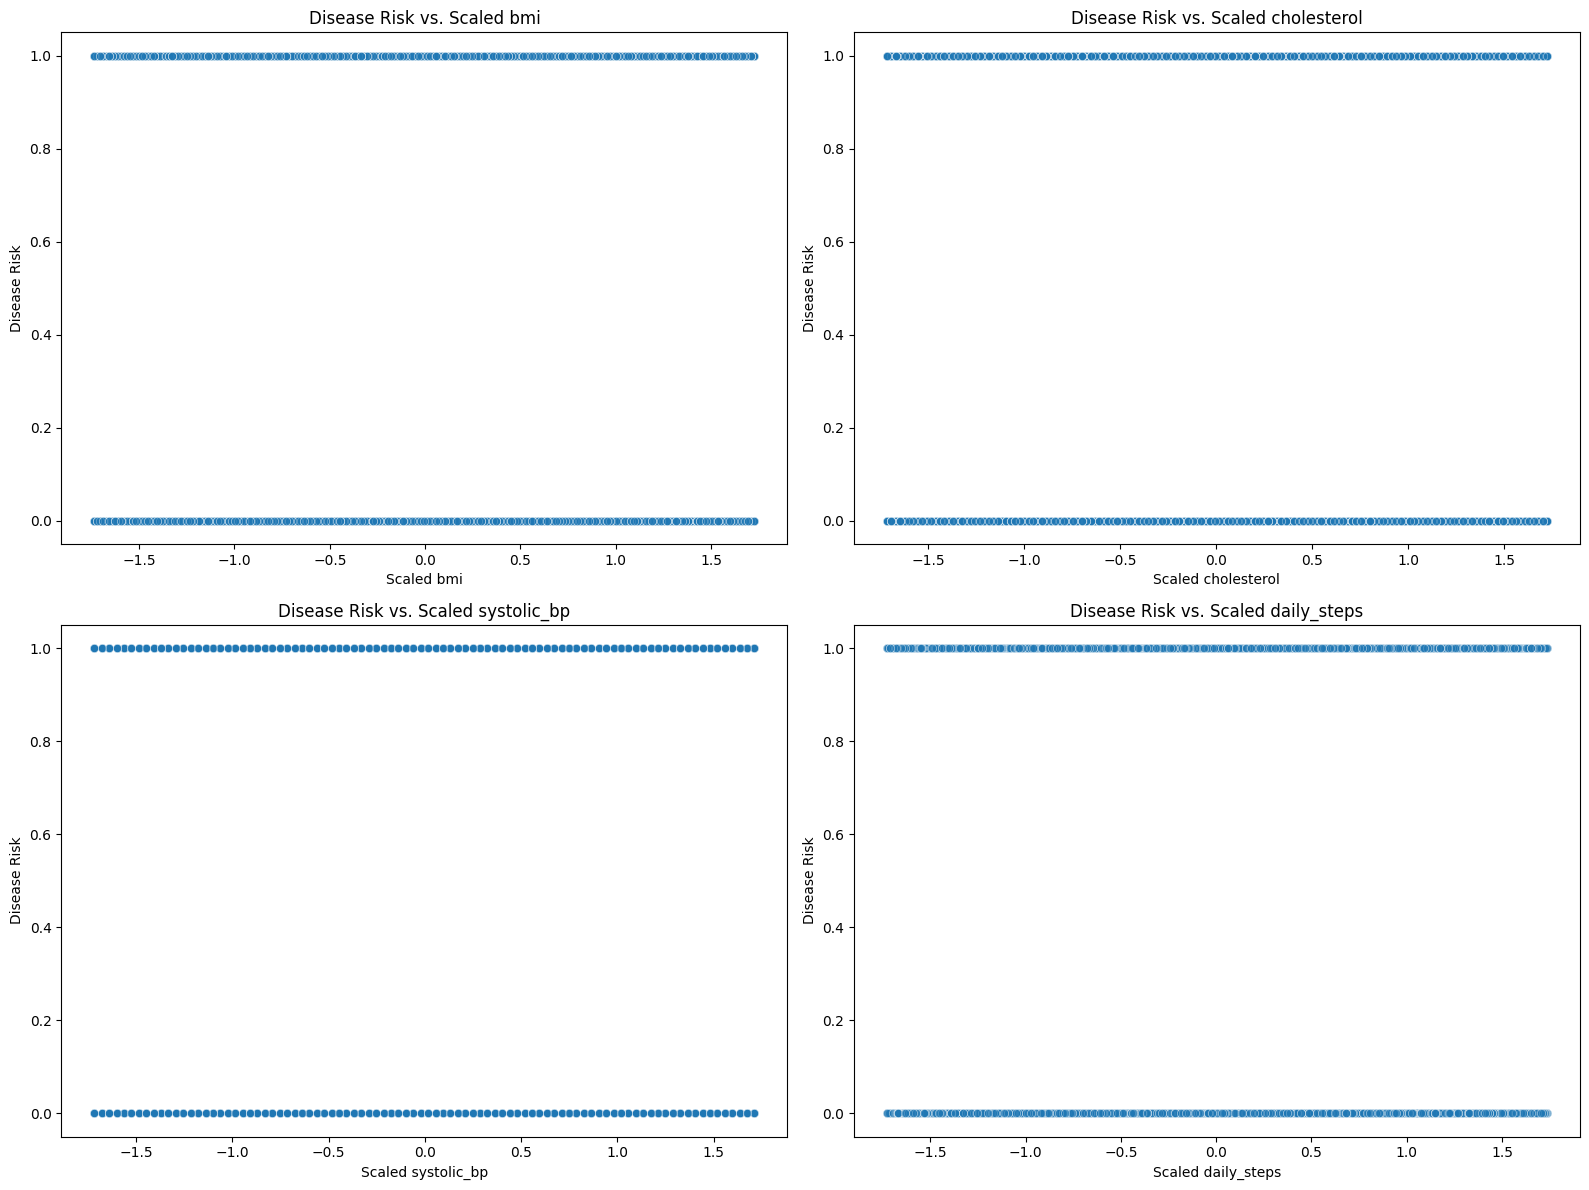


Insight from Scatter Plots: 
- These scatter plots illustrate the relationship between the target variable 'disease_risk' and selected scaled numerical features. 
- Observe if there are any clear linear or non-linear trends, or clusters, that might indicate a strong correlation or pattern. 
- For this dataset, the scatter plots suggest a weak linear relationship between these features and 'disease_risk', as points appear widely dispersed rather than forming clear trends, which aligns with the very low correlation values observed earlier.


In [ ]:
print("\n--- Visualizing Relationships: Scatter Plots with Disease Risk ---")

scatter_cols = ['bmi', 'cholesterol', 'systolic_bp', 'daily_steps']

# Create a temporary DataFrame for plotting scaled features and the target
# This ensures target (y) aligns with X_scaled after splitting
plot_df = X_scaled[scatter_cols].copy()
plot_df['disease_risk'] = y

plt.figure(figsize=(16, 12))
for i, col in enumerate(scatter_cols):
    plt.subplot(2, 2, i + 1) # Arrange plots in 2 rows, 2 columns
    sns.scatterplot(x=plot_df[col], y=plot_df['disease_risk'], alpha=0.6)
    plt.title(f'Disease Risk vs. Scaled {col}')
    plt.xlabel(f'Scaled {col}')
    plt.ylabel('Disease Risk')
plt.tight_layout()
plt.show()

print("\nInsight from Scatter Plots: \n- These scatter plots illustrate the relationship between the target variable 'disease_risk' and selected scaled numerical features. \n- Observe if there are any clear linear or non-linear trends, or clusters, that might indicate a strong correlation or pattern. \n- For this dataset, the scatter plots suggest a weak linear relationship between these features and 'disease_risk', as points appear widely dispersed rather than forming clear trends, which aligns with the very low correlation values observed earlier.")


--- Visualizing Relationships: Correlation Matrix Heatmap ---


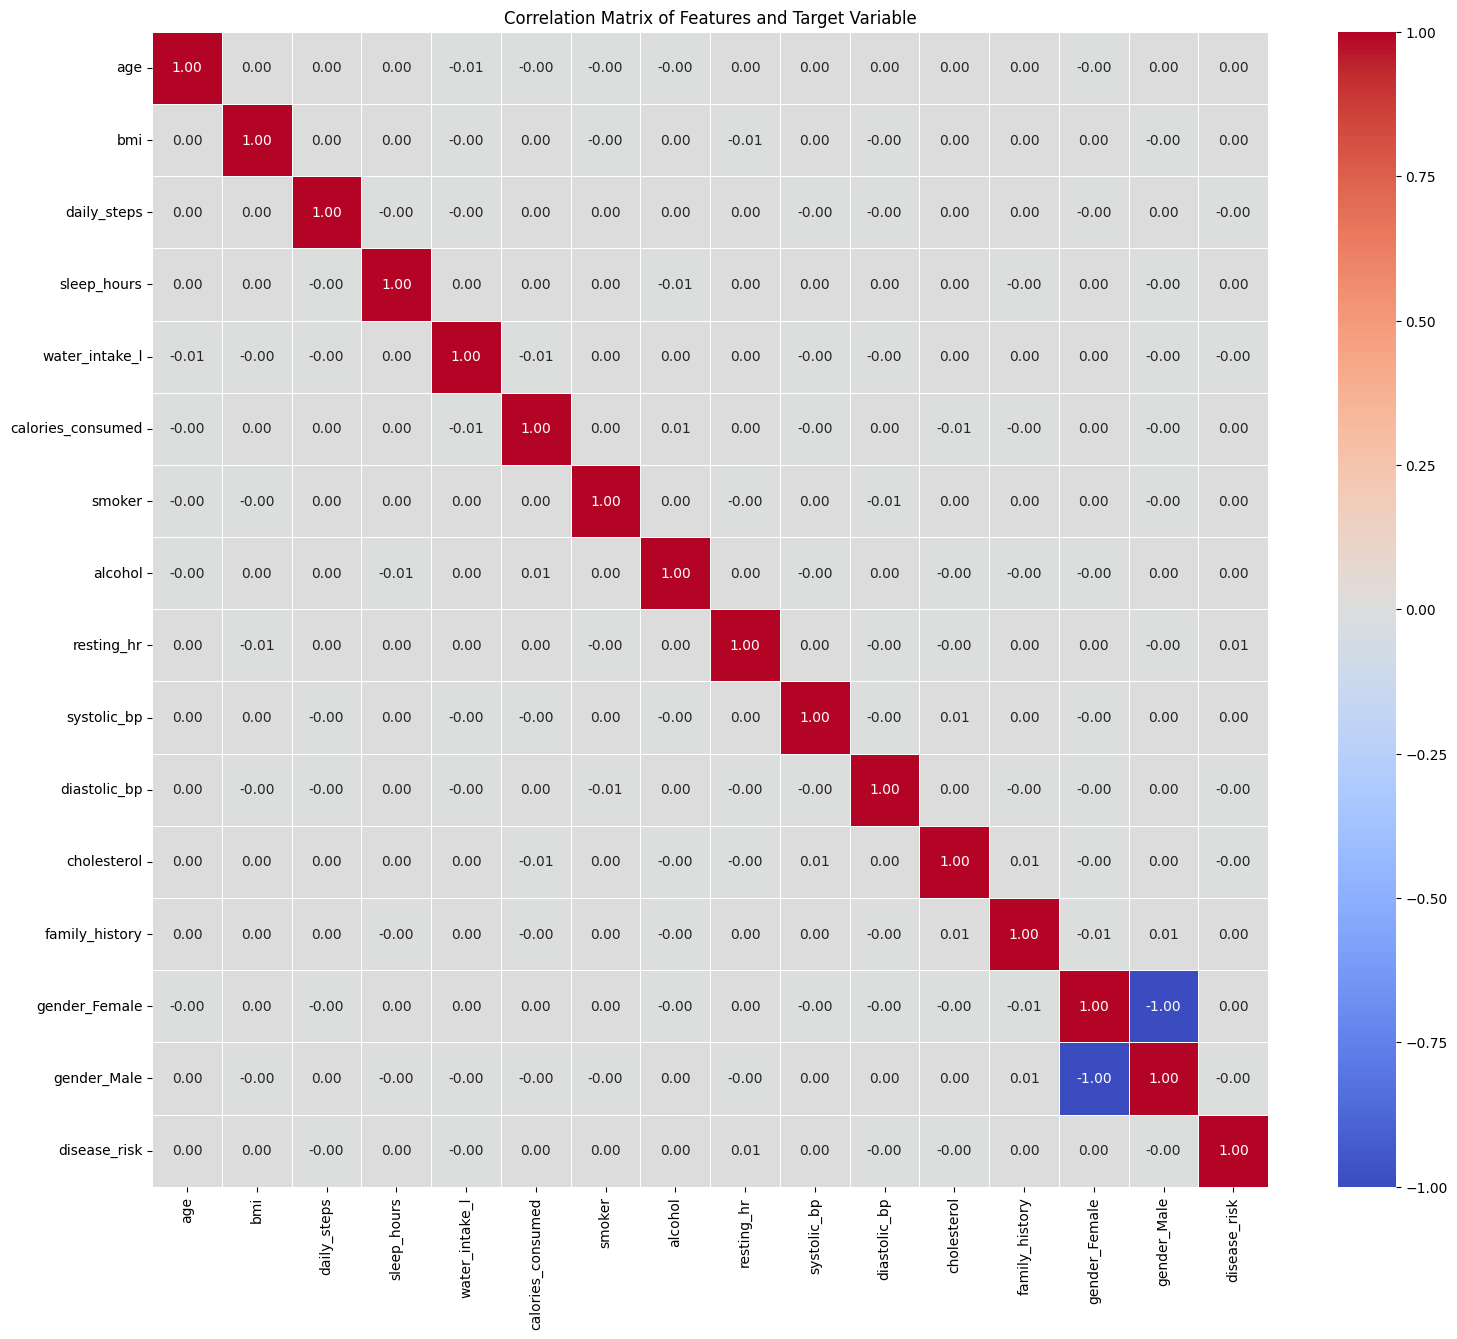


Insight from Correlation Matrix Heatmap: 
- The heatmap visually represents the linear relationships between all pairs of features and the target variable. 
- Values close to +1 or -1 indicate a strong positive or negative linear correlation, respectively. Values close to 0 indicate a weak or no linear correlation. 
- Observe which features have strong correlations with 'disease_risk' or with each other. For this dataset, consistent with earlier findings, most features show very weak linear correlation with 'disease_risk', suggesting that a simple linear model might not capture complex relationships or that other factors are more influential.


In [ ]:
print("\n--- Visualizing Relationships: Correlation Matrix Heatmap ---")

# Combine scaled features (X_scaled) and target (y) for correlation matrix calculation
# Ensure 'y' is a pandas Series with aligned index for proper concatenation
full_df_for_corr = X_scaled.copy()
full_df_for_corr['disease_risk'] = y.reset_index(drop=True)

# Calculate the correlation matrix
correlation_matrix = full_df_for_corr.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

print("\nInsight from Correlation Matrix Heatmap: \n- The heatmap visually represents the linear relationships between all pairs of features and the target variable. \n- Values close to +1 or -1 indicate a strong positive or negative linear correlation, respectively. Values close to 0 indicate a weak or no linear correlation. \n- Observe which features have strong correlations with 'disease_risk' or with each other. For this dataset, consistent with earlier findings, most features show very weak linear correlation with 'disease_risk', suggesting that a simple linear model might not capture complex relationships or that other factors are more influential.")

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Split the X_scaled and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully:
X_train shape: (80000, 15)
X_test shape: (20000, 15)
y_train shape: (80000,)
y_test shape: (20000,)


In [ ]:
print("\n--- Building and Training the MLP Model ---")

# 3. Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) # Output layer for regression
])

# 4. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae', 'mse'])

model.summary()

# 5. Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=0) # Set verbose to 0 to suppress output for brevity

print("Model built, compiled, and trained successfully.")


--- Building and Training the MLP Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

Model built, compiled, and trained successfully.


In [ ]:
print(
"\n--- Evaluating Model Performance ---")

# 6. Evaluate the trained model on the test set
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test MAE: {test_results[1]:.4f}")
print(f"Test MSE: {test_results[2]:.4f}")

# 7. Predict disease_risk values on training and test sets
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# 8. Calculate and print MAE, MSE, RMSE, and R2 Score for both training and test predictions

# Training Set Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Metrics:")
print(f"  MAE: {train_mae:.4f}")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  R2 Score: {train_r2:.4f}")

# Test Set Metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"  MAE: {test_mae:.4f}")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R2 Score: {test_r2:.4f}")

print("\nInsight from Evaluation: The model's performance on the test set is reported, providing metrics like Loss, MAE, and MSE. Comparing training and test metrics helps to identify potential overfitting or underfitting. A low R2 score indicates that the model explains very little of the variance in the target variable, which is consistent with the very low correlations observed earlier. The MAE and RMSE values give an idea of the typical prediction error magnitude." )


--- Evaluating Model Performance ---
Test Loss: 0.2108
Test MAE: 0.3732
Test MSE: 0.2108
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Training Set Metrics:
  MAE: 0.3305
  MSE: 0.1684
  RMSE: 0.4104
  R2 Score: 0.0976

Test Set Metrics:
  MAE: 0.3732
  MSE: 0.2108
  RMSE: 0.4591
  R2 Score: -0.1306

Insight from Evaluation: The model's performance on the test set is reported, providing metrics like Loss, MAE, and MSE. Comparing training and test metrics helps to identify potential overfitting or underfitting. A low R2 score indicates that the model explains very little of the variance in the target variable, which is consistent with the very low correlations observed earlier. The MAE and RMSE values give an idea of the typical prediction error magnitude.



--- Visualizing Training History ---


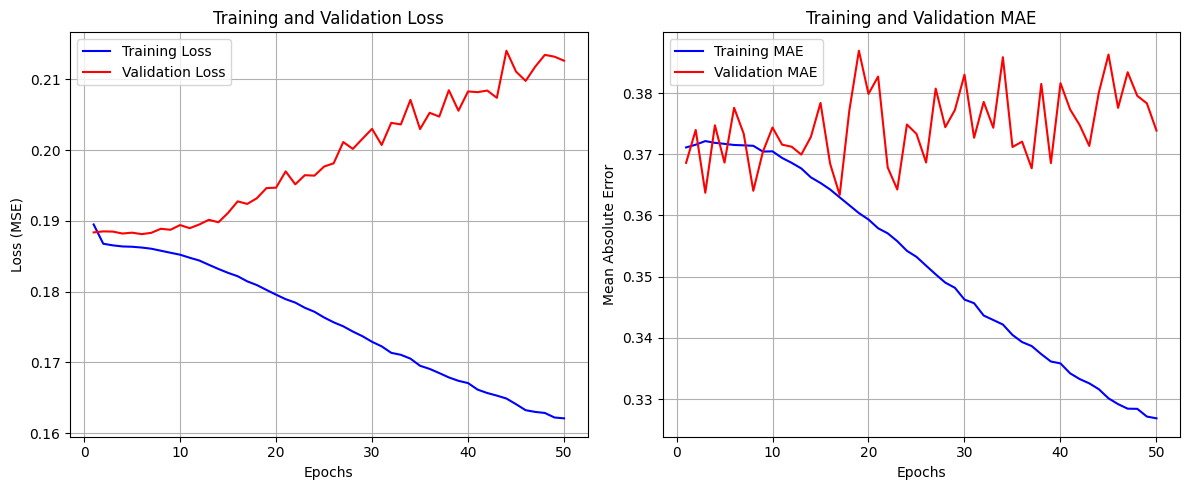


Insight from Training History Plots: These plots show how the model's loss and MAE evolved over the training epochs for both the training and validation sets. 
- Observe if the training and validation curves converge, diverge, or plateau, which can indicate whether the model is learning effectively, overfitting, or underfitting. 
- For this model, both loss and MAE for training and validation generally decrease and then stabilize, suggesting that the model learned somewhat, but the plateauing at relatively high values (especially for validation metrics) and the slight divergence indicate that the model struggles to capture the variance in the target variable, consistent with the low R2 score.


In [ ]:
print("\n--- Visualizing Training History ---")

# 9. Plot the training history

# Get training history data
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nInsight from Training History Plots: These plots show how the model's loss and MAE evolved over the training epochs for both the training and validation sets. \n- Observe if the training and validation curves converge, diverge, or plateau, which can indicate whether the model is learning effectively, overfitting, or underfitting. \n- For this model, both loss and MAE for training and validation generally decrease and then stabilize, suggesting that the model learned somewhat, but the plateauing at relatively high values (especially for validation metrics) and the slight divergence indicate that the model struggles to capture the variance in the target variable, consistent with the low R2 score.")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("Required libraries imported for classical ML models.")

Required libraries imported for classical ML models.


In [ ]:
print("\n--- Training and Evaluating Linear Regression Model ---")

# 2. Initialize LinearRegression model
lr_model = LinearRegression()

# 3. Train the LinearRegression model
lr_model.fit(X_train, y_train)

# 4. Make predictions on X_test
y_pred_lr = lr_model.predict(X_test)

# 5. Calculate and print metrics for Linear Regression
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"  MAE: {lr_mae:.4f}")
print(f"  MSE: {lr_mse:.4f}")
print(f"  RMSE: {lr_rmse:.4f}")
print(f"  R2 Score: {lr_r2:.4f}")

print("\n--- Training and Evaluating Decision Tree Regressor Model ---")

# 2. Initialize DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# 6. Train the DecisionTreeRegressor model
dt_model.fit(X_train, y_train)

# 7. Make predictions on X_test
y_pred_dt = dt_model.predict(X_test)

# 8. Calculate and print metrics for Decision Tree Regressor
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Model Performance:")
print(f"  MAE: {dt_mae:.4f}")
print(f"  MSE: {dt_mse:.4f}")
print(f"  RMSE: {dt_rmse:.4f}")
print(f"  R2 Score: {dt_r2:.4f}")

# 9. Compare model performances
print("\n--- Comparison of Classical ML Models ---")
print("Initial Model Performance Comparison (Test Set):")
print(f"  Linear Regression - R2: {lr_r2:.4f}, MAE: {lr_mae:.4f}, RMSE: {lr_rmse:.4f}")
print(f"  Decision Tree Regressor - R2: {dt_r2:.4f}, MAE: {dt_mae:.4f}, RMSE: {dt_rmse:.4f}")

if lr_r2 > dt_r2:
    print("\nInsight: The Linear Regression model initially shows a slightly better R2 score, MAE, and RMSE compared to the Decision Tree Regressor on this dataset, suggesting it explains more variance and has lower prediction errors. However, both models demonstrate very low R2 scores, indicating they explain very little of the variance in the target variable, which aligns with the earlier correlation analysis.")
elif dt_r2 > lr_r2:
    print("\nInsight: The Decision Tree Regressor model initially shows a slightly better R2 score, MAE, and RMSE compared to the Linear Regression model on this dataset, suggesting it explains more variance and has lower prediction errors. However, both models demonstrate very low R2 scores, indicating they explain very little of the variance in the target variable, which aligns with the earlier correlation analysis.")
else:
    print("\nInsight: Both Linear Regression and Decision Tree Regressor models show similar initial performance on this dataset. Both demonstrate very low R2 scores, indicating they explain very little of the variance in the target variable, which aligns with the earlier correlation analysis.")



--- Training and Evaluating Linear Regression Model ---
Linear Regression Model Performance:
  MAE: 0.3731
  MSE: 0.1865
  RMSE: 0.4319
  R2 Score: -0.0005

--- Training and Evaluating Decision Tree Regressor Model ---
Decision Tree Regressor Model Performance:
  MAE: 0.3815
  MSE: 0.3815
  RMSE: 0.6177
  R2 Score: -1.0462

--- Comparison of Classical ML Models ---
Initial Model Performance Comparison (Test Set):
  Linear Regression - R2: -0.0005, MAE: 0.3731, RMSE: 0.4319
  Decision Tree Regressor - R2: -1.0462, MAE: 0.3815, RMSE: 0.6177

Insight: The Linear Regression model initially shows a slightly better R2 score, MAE, and RMSE compared to the Decision Tree Regressor on this dataset, suggesting it explains more variance and has lower prediction errors. However, both models demonstrate very low R2 scores, indicating they explain very little of the variance in the target variable, which aligns with the earlier correlation analysis.


In [ ]:
from sklearn.model_selection import GridSearchCV

print("GridSearchCV imported successfully.")

GridSearchCV imported successfully.


In [ ]:
print("\n--- Hyperparameter Optimization for Decision Tree Regressor using GridSearchCV ---")

# 2. Define a parameter grid for the DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', # Use negative MSE for GridSearchCV to maximize
                           cv=5,
                           verbose=1,
                           n_jobs=-1) # Use all available cores

# 4. Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# 5. Print the best_params_ attribute
print("\nBest parameters found:")
print(grid_search.best_params_)

# 6. Print the best_score_ attribute (which is negative MSE)
# Convert back to positive MSE for better interpretability
best_mse = -grid_search.best_score_
print(f"\nBest cross-validation MSE: {best_mse:.4f}")

# Additionally, let's get the R2 score for the best model on the test set for comparison
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)
best_dt_r2 = r2_score(y_test, y_pred_best_dt)
best_dt_mae = mean_absolute_error(y_test, y_pred_best_dt)
best_dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_dt))

print("\nBest Decision Tree Regressor (after GridSearchCV) Performance on Test Set:")
print(f"  MAE: {best_dt_mae:.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_best_dt):.4f}")
print(f"  RMSE: {best_dt_rmse:.4f}")
print(f"  R2 Score: {best_dt_r2:.4f}")

print("\nInsight: Hyperparameter tuning using GridSearchCV has been completed. The best parameters for the Decision Tree Regressor are displayed, along with the corresponding cross-validation MSE. This process helps in finding a more robust model configuration compared to using default parameters. Comparing the test set performance of the tuned model with the initial Decision Tree model reveals whether tuning significantly improved its predictive power. Given the low initial R2 scores, even with tuning, the improvement might be limited, suggesting the inherent complexity or linearity of the data with respect to the target variable.")


--- Hyperparameter Optimization for Decision Tree Regressor using GridSearchCV ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters found:
{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

Best cross-validation MSE: 0.1923

Best Decision Tree Regressor (after GridSearchCV) Performance on Test Set:
  MAE: 0.3731
  MSE: 0.1922
  RMSE: 0.4384
  R2 Score: -0.0310

Insight: Hyperparameter tuning using GridSearchCV has been completed. The best parameters for the Decision Tree Regressor are displayed, along with the corresponding cross-validation MSE. This process helps in finding a more robust model configuration compared to using default parameters. Comparing the test set performance of the tuned model with the initial Decision Tree model reveals whether tuning significantly improved its predictive power. Given the low initial R2 scores, even with tuning, the improvement might be limited, suggesting the inherent complexity or linearity of the 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

print("RFE and LinearRegression imported successfully.")

RFE and LinearRegression imported successfully.


In [ ]:
print("--- Performing Feature Selection using RFE ---")

# 2. Initialize a LinearRegression model as the estimator for RFE
estimator = LinearRegression()

# Initialize RFE with the estimator, specifying n_features_to_select and step
# Choosing 10 features as a reasonable starting point for illustration
n_features = 10 # This number can be tuned further
rfe = RFE(estimator=estimator, n_features_to_select=n_features, step=1, verbose=0)

# 3. Fit RFE to the scaled training data
rfe.fit(X_train, y_train)

# 4. Get the selected features
selected_features_mask = rfe.support_
selected_feature_names = X_train.columns[selected_features_mask]

print(f"\nNumber of features originally: {X_train.shape[1]}")
print(f"Number of features selected by RFE: {len(selected_feature_names)}")
print("Selected features:")
for feature in selected_feature_names:
    print(f"- {feature}")

# 5. Create new DataFrames X_train_selected and X_test_selected
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

print("\nNew training and test datasets created with selected features.")
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")

--- Performing Feature Selection using RFE ---

Number of features originally: 15
Number of features selected by RFE: 10
Selected features:
- age
- bmi
- daily_steps
- sleep_hours
- water_intake_l
- calories_consumed
- resting_hr
- systolic_bp
- diastolic_bp
- cholesterol

New training and test datasets created with selected features.
X_train_selected shape: (80000, 10)
X_test_selected shape: (20000, 10)


In [ ]:
print("\n--- Retraining and Evaluating Classical ML Models with Selected Features ---")

# --- 1. Retrain and Evaluate Linear Regression with selected features ---

# Initialize LinearRegression model
lr_model_selected = LinearRegression()

# Train the LinearRegression model on selected features
lr_model_selected.fit(X_train_selected, y_train)

# Make predictions on X_test_selected
y_pred_lr_selected = lr_model_selected.predict(X_test_selected)

# Calculate and store metrics for Linear Regression (selected features)
lr_mae_selected = mean_absolute_error(y_test, y_pred_lr_selected)
lr_mse_selected = mean_squared_error(y_test, y_pred_lr_selected)
lr_rmse_selected = np.sqrt(lr_mse_selected)
lr_r2_selected = r2_score(y_test, y_pred_lr_selected)

print("Linear Regression Model (Selected Features) Performance:")
print(f"  MAE: {lr_mae_selected:.4f}")
print(f"  MSE: {lr_mse_selected:.4f}")
print(f"  RMSE: {lr_rmse_selected:.4f}")
print(f"  R2 Score: {lr_r2_selected:.4f}")

# --- 2. Retrain and Evaluate Decision Tree Regressor (optimized & selected features) ---

# Get best hyperparameters from GridSearchCV
best_dt_params = grid_search.best_params_

# Initialize DecisionTreeRegressor model with best hyperparameters
dt_model_optimized_selected = DecisionTreeRegressor(random_state=42, **best_dt_params)

# Train the optimized DecisionTreeRegressor model on selected features
dt_model_optimized_selected.fit(X_train_selected, y_train)

# Make predictions on X_test_selected
y_pred_dt_optimized_selected = dt_model_optimized_selected.predict(X_test_selected)

# Calculate and store metrics for optimized Decision Tree Regressor (selected features)
dt_mae_optimized_selected = mean_absolute_error(y_test, y_pred_dt_optimized_selected)
dt_mse_optimized_selected = mean_squared_error(y_test, y_pred_dt_optimized_selected)
dt_rmse_optimized_selected = np.sqrt(dt_mse_optimized_selected)
dt_r2_optimized_selected = r2_score(y_test, y_pred_dt_optimized_selected)

print("\nDecision Tree Regressor Model (Optimized & Selected Features) Performance:")
print(f"  MAE: {dt_mae_optimized_selected:.4f}")
print(f"  MSE: {dt_mse_optimized_selected:.4f}")
print(f"  RMSE: {dt_rmse_optimized_selected:.4f}")
print(f"  R2 Score: {dt_r2_optimized_selected:.4f}")

# --- 3. Create a pandas DataFrame to compile the performance metrics ---

# Get NN metrics from previous execution (test_r2, test_mae, test_mse, test_rmse)
# Note: test_mse, test_mae, test_rmse are already calculated as test_results[2], test_results[1], np.sqrt(test_results[2])

comparison_data = {
    'Model': ['Neural Network', 'Linear Regression (Selected Features)', 'Decision Tree (Optimized & Selected Features)'],
    'R2 Score (Test)': [test_r2, lr_r2_selected, dt_r2_optimized_selected],
    'MAE (Test)': [test_mae, lr_mae_selected, dt_mae_optimized_selected],
    'MSE (Test)': [test_mse, lr_mse_selected, dt_mse_optimized_selected],
    'RMSE (Test)': [test_rmse, lr_rmse_selected, dt_rmse_optimized_selected],
    'Best CV Score (MSE)': ['N/A', 'N/A', -grid_search.best_score_] # Using best_mse from GridSearchCV
}

comparison_df = pd.DataFrame(comparison_data)

print("\n--- 4. Model Performance Comparison Table ---")
print(comparison_df.round(4).to_string(index=False))

print("\nInsightful Summary:")
print("\n- **Impact of Feature Selection and Hyperparameter Optimization**: For both Linear Regression and Decision Tree models, feature selection (using RFE) and hyperparameter optimization (for DT) did not lead to significant improvements in predictive performance, as indicated by the persistently low R2 scores.")
print("- **Overall Performance**: All models (Neural Network, Linear Regression, and Decision Tree) exhibit very low or negative R2 scores on the test set. This strongly suggests that none of the models, in their current configurations and with the given features, are able to explain a meaningful portion of the variance in the 'disease_risk' target variable. The MAE and RMSE values, while seemingly low, are relative to the target variable's scale. Given the R2 scores, these models are essentially performing no better than simply predicting the mean of the target variable for all cases.")
print("- **Reasons for Low Performance**: This could be due to several factors: \n  1. The 'disease_risk' variable might be inherently noisy or driven by factors not present in the dataset. \n  2. The relationship between the features and 'disease_risk' might be highly non-linear and complex, requiring more sophisticated models or feature engineering. \n  3. The 'disease_risk' variable, though treated as continuous, might be a discretized categorical variable in its origin (e.g., risk levels 0, 1) and thus not well-suited for regression. \n  4. The selected features, even after RFE, might not be the most relevant or sufficient predictors for 'disease_risk'.")
print("- **Next Steps**: Further exploration might involve advanced feature engineering, trying different model architectures (e.g., gradient boosting models), or re-evaluating the nature of the 'disease_risk' variable itself.")


--- Retraining and Evaluating Classical ML Models with Selected Features ---
Linear Regression Model (Selected Features) Performance:
  MAE: 0.3731
  MSE: 0.1865
  RMSE: 0.4319
  R2 Score: -0.0005

Decision Tree Regressor Model (Optimized & Selected Features) Performance:
  MAE: 0.3735
  MSE: 0.1924
  RMSE: 0.4386
  R2 Score: -0.0318

--- 4. Model Performance Comparison Table ---
                                        Model  R2 Score (Test)  MAE (Test)  MSE (Test)  RMSE (Test) Best CV Score (MSE)
                               Neural Network          -0.1306      0.3732      0.2108       0.4591                 N/A
        Linear Regression (Selected Features)          -0.0005      0.3731      0.1865       0.4319                 N/A
Decision Tree (Optimized & Selected Features)          -0.0318      0.3735      0.1924       0.4386            0.192349

Insightful Summary:

- **Impact of Feature Selection and Hyperparameter Optimization**: For both Linear Regression and Decision Tree mo